# First Example
In this basic example we illustrate how to generate a synthetic data set starting from a configuration file ``config.py`. We simulate the observation of an Earth-twin around a Suntwin at 10 pc. We are going to use the configuration file defined in the [config file tutorial](create_config_file.rst).

## Import modules and specify paths

In [42]:
from pathlib import Path

import matplotlib.pyplot as plt
from phringe.entities.configuration import Configuration
from phringe.main import PHRINGE

## Create the Main PHRINGE Object

`PHRINGE` will run on CPU if `gpu=None`. To run int on GPU, an index specifying the GPU is required, e.g. `gpu=0`. For reproducibility `seed` can be set to a specific value, resulting in identical results for each run. Note that `seed=None` results in the use of a random seed each run.

In [43]:
phringe = PHRINGE(gpu_index=1, seed=1, grid_size=40)

## Create a Configuration and Set it 

We now create a configuration object from the configuration file ``config.py``. This file contains the parameters defining the observation, the isntrument and the scene with its sources and is shown [here](../source/configuration.rst#configuration-dictionary-file).

In [44]:
config_file_path = Path('../_static/config.py')

config = Configuration(path=config_file_path)
phringe.set(config)

## Calculate the Counts on the Detector
We calculate the raw counts at all four outputs of the nulling interferometer and use it to calculate the differential counts (on a CPU this is likely going to take a few tens of seconds).

In [34]:
counts = phringe.get_counts()
diff_counts = counts[2] - counts[3]  # Alternatively: phringe.get_diff_counts()

100%|██████████| 1/1 [00:11<00:00, 11.77s/it]


## Plot the Differential Counts
Then we can plot the differential counts:

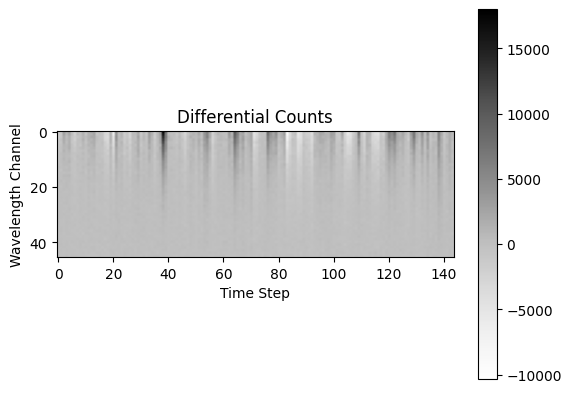

In [35]:
plt.imshow(diff_counts.cpu().numpy(), cmap='Greys')
plt.title('Differential Counts')
plt.ylabel('Wavelength Channel')
plt.xlabel('Time Step')
plt.colorbar()
plt.show()